## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from matplotlib.pyplot import figure
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation

from datasets import load_dataset
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nitya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nitya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2. Load the Dataset

In [2]:
dataset = load_dataset("Ohwang/Nuclear_tweets_12k")

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['tweets', 'Label'],
        num_rows: 12091
    })
})

In [4]:
df = pd.DataFrame(dataset['train'])

In [5]:
# Create a new column 'Id' using the index values
df['Id'] = df.index

# Display the updated DataFrame
print(df)

                                                  tweets     Label     Id
0      Tech Talk Guru Craig Peterson breaks down more...  Positive      0
1      RT @JayinKyiv: The exact narrative you'd expec...  Negative      1
2      Remember when Biden and the demonrats shut dow...  Negative      2
3      #Constitution Can anyone explain how it's cons...   Neutral      3
4      @DaveyBiden2024 @Socialistdemmo Use the open l...   Neutral      4
...                                                  ...       ...    ...
12086  Instead of reflecting on the Fukushima debacle...  Negative  12086
12087  2/\nYes, indeed there may be a leak of radioac...   Neutral  12087
12088  "The Armed Forces of Ukraine officially announ...  Negative  12088
12089  The Liberal Party of Australia can never ever ...  Negative  12089
12090  Donetsk.\n\n It was noted that as a result of ...  Negative  12090

[12091 rows x 3 columns]


In [6]:
df

,tweets,Label,Id
0,Tech Talk Guru Craig Peterson breaks down more...,Positive,0
1,RT @JayinKyiv: The exact narrative you'd expec...,Negative,1
2,Remember when Biden and the demonrats shut dow...,Negative,2
3,#Constitution Can anyone explain how it's cons...,Neutral,3
4,@DaveyBiden2024 @Socialistdemmo Use the open l...,Neutral,4
...,...,...,...
12086,Instead of reflecting on the Fukushima debacle...,Negative,12086
12087,"2/\nYes, indeed there may be a leak of radioac...",Neutral,12087
12088,"""The Armed Forces of Ukraine officially announ...",Negative,12088
12089,The Liberal Party of Australia can never ever ...,Negative,12089


In [7]:
column_mapping = {
    'tweets': 'text',
    # Add more columns as needed
}

df.rename(columns=column_mapping, inplace=True)

In [8]:
columns_to_delete = ['Label']
df.drop(columns=columns_to_delete, inplace=True)
df

,text,Id
0,Tech Talk Guru Craig Peterson breaks down more...,0
1,RT @JayinKyiv: The exact narrative you'd expec...,1
2,Remember when Biden and the demonrats shut dow...,2
3,#Constitution Can anyone explain how it's cons...,3
4,@DaveyBiden2024 @Socialistdemmo Use the open l...,4
...,...,...
12086,Instead of reflecting on the Fukushima debacle...,12086
12087,"2/\nYes, indeed there may be a leak of radioac...",12087
12088,"""The Armed Forces of Ukraine officially announ...",12088
12089,The Liberal Party of Australia can never ever ...,12089


In [9]:
# Rearrange columns
df = df[['Id', 'text']]

# Display the updated DataFrame
df

,Id,text
0,0,Tech Talk Guru Craig Peterson breaks down more...
1,1,RT @JayinKyiv: The exact narrative you'd expec...
2,2,Remember when Biden and the demonrats shut dow...
3,3,#Constitution Can anyone explain how it's cons...
4,4,@DaveyBiden2024 @Socialistdemmo Use the open l...
...,...,...
12086,12086,Instead of reflecting on the Fukushima debacle...
12087,12087,"2/\nYes, indeed there may be a leak of radioac..."
12088,12088,"""The Armed Forces of Ukraine officially announ..."
12089,12089,The Liberal Party of Australia can never ever ...


In [10]:
df.to_csv("C:\\Users\\nitya\\Desktop\\Notes\\T5\\TSMA\\ETE\\data.csv", index=False)

In [11]:
pd.set_option('display.max_colwidth', None)
df

,Id,text
0,0,Tech Talk Guru Craig Peterson breaks down more barriers to a bright future of next generation nuclear power. https://t.co/nEg4rVBgHJ
1,1,RT @JayinKyiv: The exact narrative you'd expect Russia to put out if they were about to blow up a Ukrainian nuclear power plant to then bla????????â¬???????
2,2,"Remember when Biden and the demonrats shut down pipelines, drilling, exploration, coal ,gas and nuclear power plants ? They're setting up the infrastructure for failure and planning to blame conservatives when they shut it ????"
3,3,#Constitution Can anyone explain how it's constitutional for the president to have a nuclear button?\n\nThe power supposedly resides with Congress. If they want to move it to the executive branch they need to have specific rules where the president is simply a last check.
4,4,@DaveyBiden2024 @Socialistdemmo Use the open land to make thousands of nuclear power plants
...,...,...
12086,12086,"Instead of reflecting on the Fukushima debacle, the Japanâs atomic industry stretched the legal service period of nuclear power units, and will probably cause another fatal accident at some nuclear power plant someday in the future."
12087,12087,"2/\nYes, indeed there may be a leak of radioactive substances from a nuclear power plant in the near future. But not from the Zaporozhye nuclear power plant, but from Chernobyl. https://t.co/zt6JJZnr7N"
12088,12088,"""The Armed Forces of Ukraine officially announce the possible preparation, in the nearest future, of a provocation on the territory of the Zaporizhzhia Nuclear Power Plant, occupied by Russian terrorists since March 4th, 2022."" https://t.co/5t6r0WsFRT"
12089,12089,The Liberal Party of Australia can never ever be trusted as they live in another reality\n\nA bunch of radical neoliberal extremists low intellects that threatens to further destroy our future &amp; economy\n\nhttps://t.co/cgjJKjLzHk


## 3. Exploratory Analysis

In [12]:
df.shape

(12091, 2)

In [13]:
# Understand the structure of your dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12091 entries, 0 to 12090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      12091 non-null  int64 
 1   text    12091 non-null  object
dtypes: int64(1), object(1)
memory usage: 189.0+ KB
None


In [14]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Id      0
text    0
dtype: int64


In [15]:
# Basic NLTK processing
df['text'][88]

'So if you care about climate, the Green Party is ironically the last party you should vote for. Even Tories recognize the need for nuclear. In the UK at least. Did you know that the Finnish Greens have dropped their opposition to nuclear? Be more like the Finnish Greens, Caroline'

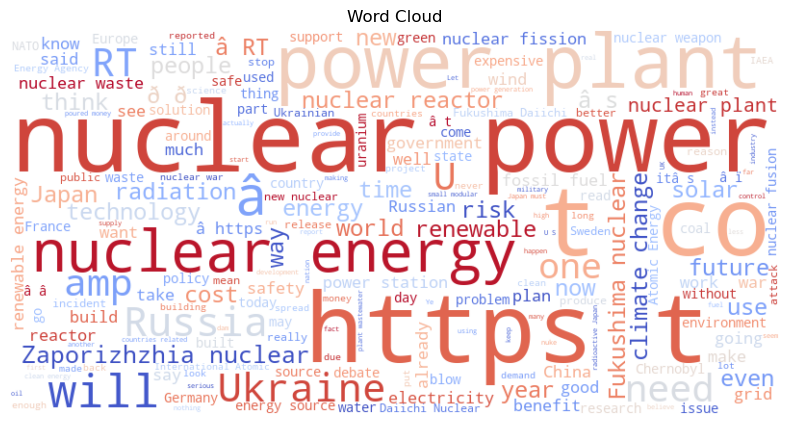

In [16]:
# Word Cloud with specified color palette
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(' '.join(df['text']))
figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

C:\Users\nitya\AppData\Local\Temp\ipykernel_13412\1733354055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text Length'] = df['text'].apply(len)


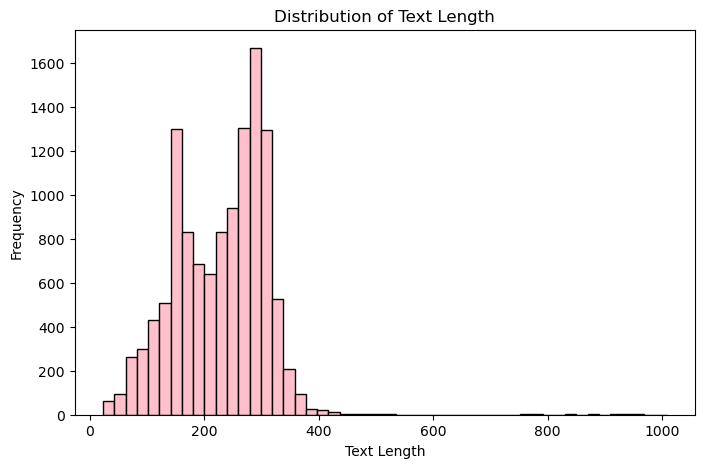

In [17]:
# Histogram of Text Length in Pink
plt.figure(figsize=(8, 5))
df['Text Length'] = df['text'].apply(len)
plt.hist(df['Text Length'], bins=50, edgecolor='black', color='pink')  # Adjusting color to pink
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Sentiment Analysis

## 4. Basic NLTK Processing

In [18]:
# Basic NLTK processing
example = df['text'][50]
print(example)

"The nuclear radiation exposed the people of #Balochistan to several chronic diseases.  Many children were born with #disabilities, and #diseases such as #cancer and skin disorders"   https://t.co/3tgwl1lstG #health #med #humanrights #nonukes


In [19]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['``',
 'The',
 'nuclear',
 'radiation',
 'exposed',
 'the',
 'people',
 'of',
 '#',
 'Balochistan']

In [20]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('``', '``'),
 ('The', 'DT'),
 ('nuclear', 'JJ'),
 ('radiation', 'NN'),
 ('exposed', 'VBD'),
 ('the', 'DT'),
 ('people', 'NNS'),
 ('of', 'IN'),
 ('#', '#'),
 ('Balochistan', 'NNP')]

## 5. VADER Seniment Scoring

VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

In [21]:
# VADER (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Scoring
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [22]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(example)

{'neg': 0.042, 'neu': 0.958, 'pos': 0.0, 'compound': -0.0772}

In [23]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text']
    myid = i
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/12091 [00:00<?, ?it/s]

In [24]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [25]:
vaders

,Id,neg,neu,pos,compound,text,Text Length
0,0,0.000,0.843,0.157,0.4877,Tech Talk Guru Craig Peterson breaks down more barriers to a bright future of next generation nuclear power. https://t.co/nEg4rVBgHJ,132
1,1,0.000,1.000,0.000,0.0000,RT @JayinKyiv: The exact narrative you'd expect Russia to put out if they were about to blow up a Ukrainian nuclear power plant to then bla????????â¬???????,157
2,2,0.168,0.784,0.048,-0.6966,"Remember when Biden and the demonrats shut down pipelines, drilling, exploration, coal ,gas and nuclear power plants ? They're setting up the infrastructure for failure and planning to blame conservatives when they shut it ????",227
3,3,0.000,0.970,0.030,0.0772,#Constitution Can anyone explain how it's constitutional for the president to have a nuclear button?\n\nThe power supposedly resides with Congress. If they want to move it to the executive branch they need to have specific rules where the president is simply a last check.,270
4,4,0.000,1.000,0.000,0.0000,@DaveyBiden2024 @Socialistdemmo Use the open land to make thousands of nuclear power plants,91
...,...,...,...,...,...,...,...
12086,12086,0.161,0.803,0.036,-0.7269,"Instead of reflecting on the Fukushima debacle, the Japanâs atomic industry stretched the legal service period of nuclear power units, and will probably cause another fatal accident at some nuclear power plant someday in the future.",234
12087,12087,0.054,0.887,0.059,0.0387,"2/\nYes, indeed there may be a leak of radioactive substances from a nuclear power plant in the near future. But not from the Zaporozhye nuclear power plant, but from Chernobyl. https://t.co/zt6JJZnr7N",200
12088,12088,0.111,0.889,0.000,-0.6249,"""The Armed Forces of Ukraine officially announce the possible preparation, in the nearest future, of a provocation on the territory of the Zaporizhzhia Nuclear Power Plant, occupied by Russian terrorists since March 4th, 2022."" https://t.co/5t6r0WsFRT",251
12089,12089,0.249,0.624,0.127,-0.6433,The Liberal Party of Australia can never ever be trusted as they live in another reality\n\nA bunch of radical neoliberal extremists low intellects that threatens to further destroy our future &amp; economy\n\nhttps://t.co/cgjJKjLzHk,229


## 6. Sentiment Analysis with VADER

In [26]:
def get_sentiment(vaders):
    polarity = sia.polarity_scores(vaders)
    if polarity['compound'] >= 0.05:
        return "Positive"
    elif polarity['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['text'].apply(get_sentiment)
df.head()

C:\Users\nitya\AppData\Local\Temp\ipykernel_13412\2914612062.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['text'].apply(get_sentiment)


,Id,text,Text Length,Sentiment
0,0,Tech Talk Guru Craig Peterson breaks down more barriers to a bright future of next generation nuclear power. https://t.co/nEg4rVBgHJ,132,Positive
1,1,RT @JayinKyiv: The exact narrative you'd expect Russia to put out if they were about to blow up a Ukrainian nuclear power plant to then bla????????â¬???????,157,Neutral
2,2,"Remember when Biden and the demonrats shut down pipelines, drilling, exploration, coal ,gas and nuclear power plants ? They're setting up the infrastructure for failure and planning to blame conservatives when they shut it ????",227,Negative
3,3,#Constitution Can anyone explain how it's constitutional for the president to have a nuclear button?\n\nThe power supposedly resides with Congress. If they want to move it to the executive branch they need to have specific rules where the president is simply a last check.,270,Positive
4,4,@DaveyBiden2024 @Socialistdemmo Use the open land to make thousands of nuclear power plants,91,Neutral


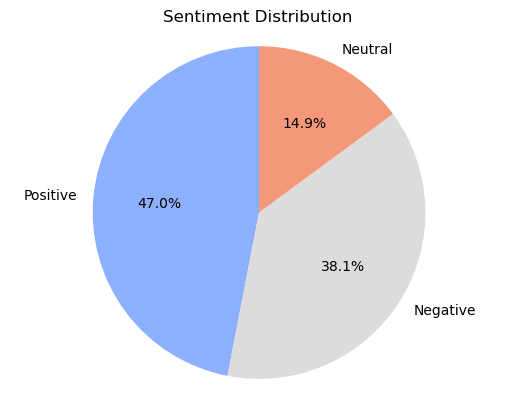

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming vaders is your DataFrame with a 'Sentiment' column

# Plot a pie chart of the sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts(normalize=True)

# Set the coolwarm color palette
colors = sns.color_palette('coolwarm', n_colors=len(sentiment_distribution))

# Create the pie chart with specified colors
fig, ax = plt.subplots()
ax.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()

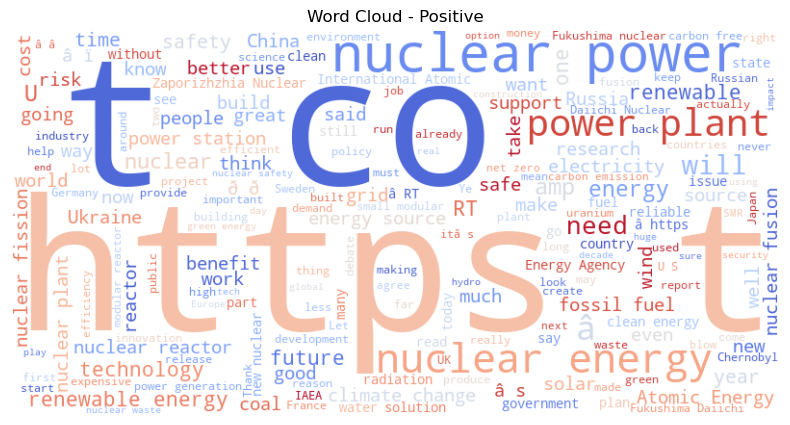

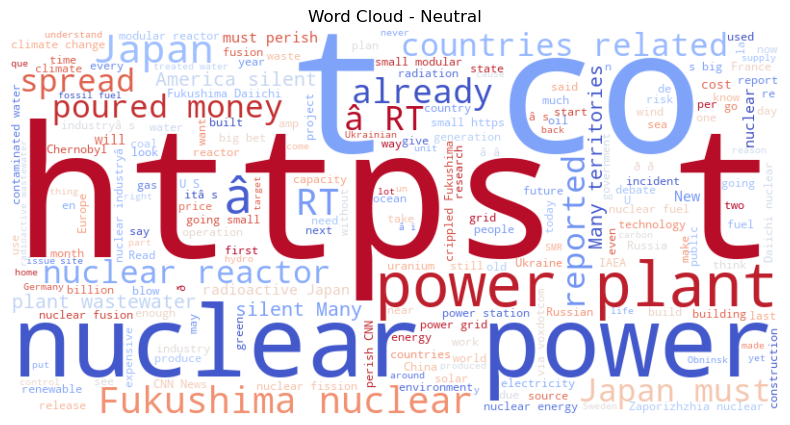

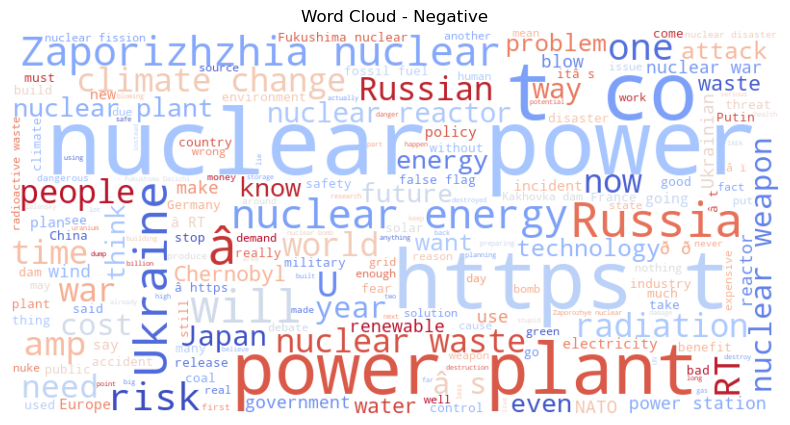

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'text' is your text column and 'Sentiment' is your sentiment column
for sentiment_class in df['Sentiment'].unique():
    subset = df[df['Sentiment'] == sentiment_class]
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(' '.join(subset['text']))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {sentiment_class}')
    plt.show()

# Topic Modelling

## 7. Text Pre-Processing

In [29]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources (run this once if you haven't downloaded them before)
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization: Split the text into individual words or subwords
df['Tokenized_Text'] = df['text'].apply(lambda x: word_tokenize(x))

# Display the preprocessed DataFrame
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\nitya\AppData\Local\Temp\ipykernel_13412\4117208874.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokenized_Text'] = df['text'].apply(lambda x: word_tokenize(x))


,Id,text,Text Length,Sentiment,Tokenized_Text
0,0,Tech Talk Guru Craig Peterson breaks down more barriers to a bright future of next generation nuclear power. https://t.co/nEg4rVBgHJ,132,Positive,"[Tech, Talk, Guru, Craig, Peterson, breaks, down, more, barriers, to, a, bright, future, of, next, generation, nuclear, power, ., https, :, //t.co/nEg4rVBgHJ]"
1,1,RT @JayinKyiv: The exact narrative you'd expect Russia to put out if they were about to blow up a Ukrainian nuclear power plant to then bla????????â¬???????,157,Neutral,"[RT, @, JayinKyiv, :, The, exact, narrative, you, 'd, expect, Russia, to, put, out, if, they, were, about, to, blow, up, a, Ukrainian, nuclear, power, plant, to, then, bla, ?, ?, ?, ?, ?, ?, ?, ?, â¬, ?, ?, ?, ?, ?, ?, ?]"
2,2,"Remember when Biden and the demonrats shut down pipelines, drilling, exploration, coal ,gas and nuclear power plants ? They're setting up the infrastructure for failure and planning to blame conservatives when they shut it ????",227,Negative,"[Remember, when, Biden, and, the, demonrats, shut, down, pipelines, ,, drilling, ,, exploration, ,, coal, ,, gas, and, nuclear, power, plants, ?, They, 're, setting, up, the, infrastructure, for, failure, and, planning, to, blame, conservatives, when, they, shut, it, ?, ?, ?, ?]"
3,3,#Constitution Can anyone explain how it's constitutional for the president to have a nuclear button?\n\nThe power supposedly resides with Congress. If they want to move it to the executive branch they need to have specific rules where the president is simply a last check.,270,Positive,"[#, Constitution, Can, anyone, explain, how, it, 's, constitutional, for, the, president, to, have, a, nuclear, button, ?, The, power, supposedly, resides, with, Congress, ., If, they, want, to, move, it, to, the, executive, branch, they, need, to, have, specific, rules, where, the, president, is, simply, a, last, check, .]"
4,4,@DaveyBiden2024 @Socialistdemmo Use the open land to make thousands of nuclear power plants,91,Neutral,"[@, DaveyBiden2024, @, Socialistdemmo, Use, the, open, land, to, make, thousands, of, nuclear, power, plants]"
...,...,...,...,...,...
12086,12086,"Instead of reflecting on the Fukushima debacle, the Japanâs atomic industry stretched the legal service period of nuclear power units, and will probably cause another fatal accident at some nuclear power plant someday in the future.",234,Negative,"[Instead, of, reflecting, on, the, Fukushima, debacle, ,, the, Japanâs, atomic, industry, stretched, the, legal, service, period, of, nuclear, power, units, ,, and, will, probably, cause, another, fatal, accident, at, some, nuclear, power, plant, someday, in, the, future, .]"
12087,12087,"2/\nYes, indeed there may be a leak of radioactive substances from a nuclear power plant in the near future. But not from the Zaporozhye nuclear power plant, but from Chernobyl. https://t.co/zt6JJZnr7N",200,Neutral,"[2/, Yes, ,, indeed, there, may, be, a, leak, of, radioactive, substances, from, a, nuclear, power, plant, in, the, near, future, ., But, not, from, the, Zaporozhye, nuclear, power, plant, ,, but, from, Chernobyl, ., https, :, //t.co/zt6JJZnr7N]"
12088,12088,"""The Armed Forces of Ukraine officially announce the possible preparation, in the nearest future, of a provocation on the territory of the Zaporizhzhia Nuclear Power Plant, occupied by Russian terrorists since March 4th, 2022."" https://t.co/5t6r0WsFRT",251,Negative,"[``, The, Armed, Forces, of, Ukraine, officially, announce, the, possible, preparation, ,, in, the, nearest, future, ,, of, a, provocation, on, the, territory, of, the, Zaporizhzhia, Nuclear, Power, Plant, ,, occupied, by, Russian, terrorists, since, March, 4th, ,, 2022, ., '', https, :, //t.co/5t6r0WsFRT]"
12089,12089,The Liberal Party of Australia can never ever be trusted as they live in another reality\n\nA bunch of radical neoliberal extremists low intellects that threatens to further destroy our future &amp; economy\n\nhttps://t.co/cgjJKjLzHk

In [30]:
# Lowercasing: Convert all text to lowercase
df['Tokenized_Text'] = df['Tokenized_Text'].apply(lambda x: [word.lower() for word in x])

# Display the preprocessed DataFrame
df

C:\Users\nitya\AppData\Local\Temp\ipykernel_13412\2448978929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokenized_Text'] = df['Tokenized_Text'].apply(lambda x: [word.lower() for word in x])


,Id,text,Text Length,Sentiment,Tokenized_Text
0,0,Tech Talk Guru Craig Peterson breaks down more barriers to a bright future of next generation nuclear power. https://t.co/nEg4rVBgHJ,132,Positive,"[tech, talk, guru, craig, peterson, breaks, down, more, barriers, to, a, bright, future, of, next, generation, nuclear, power, ., https, :, //t.co/neg4rvbghj]"
1,1,RT @JayinKyiv: The exact narrative you'd expect Russia to put out if they were about to blow up a Ukrainian nuclear power plant to then bla????????â¬???????,157,Neutral,"[rt, @, jayinkyiv, :, the, exact, narrative, you, 'd, expect, russia, to, put, out, if, they, were, about, to, blow, up, a, ukrainian, nuclear, power, plant, to, then, bla, ?, ?, ?, ?, ?, ?, ?, ?, â¬, ?, ?, ?, ?, ?, ?, ?]"
2,2,"Remember when Biden and the demonrats shut down pipelines, drilling, exploration, coal ,gas and nuclear power plants ? They're setting up the infrastructure for failure and planning to blame conservatives when they shut it ????",227,Negative,"[remember, when, biden, and, the, demonrats, shut, down, pipelines, ,, drilling, ,, exploration, ,, coal, ,, gas, and, nuclear, power, plants, ?, they, 're, setting, up, the, infrastructure, for, failure, and, planning, to, blame, conservatives, when, they, shut, it, ?, ?, ?, ?]"
3,3,#Constitution Can anyone explain how it's constitutional for the president to have a nuclear button?\n\nThe power supposedly resides with Congress. If they want to move it to the executive branch they need to have specific rules where the president is simply a last check.,270,Positive,"[#, constitution, can, anyone, explain, how, it, 's, constitutional, for, the, president, to, have, a, nuclear, button, ?, the, power, supposedly, resides, with, congress, ., if, they, want, to, move, it, to, the, executive, branch, they, need, to, have, specific, rules, where, the, president, is, simply, a, last, check, .]"
4,4,@DaveyBiden2024 @Socialistdemmo Use the open land to make thousands of nuclear power plants,91,Neutral,"[@, daveybiden2024, @, socialistdemmo, use, the, open, land, to, make, thousands, of, nuclear, power, plants]"
...,...,...,...,...,...
12086,12086,"Instead of reflecting on the Fukushima debacle, the Japanâs atomic industry stretched the legal service period of nuclear power units, and will probably cause another fatal accident at some nuclear power plant someday in the future.",234,Negative,"[instead, of, reflecting, on, the, fukushima, debacle, ,, the, japanâs, atomic, industry, stretched, the, legal, service, period, of, nuclear, power, units, ,, and, will, probably, cause, another, fatal, accident, at, some, nuclear, power, plant, someday, in, the, future, .]"
12087,12087,"2/\nYes, indeed there may be a leak of radioactive substances from a nuclear power plant in the near future. But not from the Zaporozhye nuclear power plant, but from Chernobyl. https://t.co/zt6JJZnr7N",200,Neutral,"[2/, yes, ,, indeed, there, may, be, a, leak, of, radioactive, substances, from, a, nuclear, power, plant, in, the, near, future, ., but, not, from, the, zaporozhye, nuclear, power, plant, ,, but, from, chernobyl, ., https, :, //t.co/zt6jjznr7n]"
12088,12088,"""The Armed Forces of Ukraine officially announce the possible preparation, in the nearest future, of a provocation on the territory of the Zaporizhzhia Nuclear Power Plant, occupied by Russian terrorists since March 4th, 2022."" https://t.co/5t6r0WsFRT",251,Negative,"[``, the, armed, forces, of, ukraine, officially, announce, the, possible, preparation, ,, in, the, nearest, future, ,, of, a, provocation, on, the, territory, of, the, zaporizhzhia, nuclear, power, plant, ,, occupied, by, russian, terrorists, since, march, 4th, ,, 2022, ., '', https, :, //t.co/5t6r0wsfrt]"
12089,12089,The Liberal Party of Australia can never ever be trusted as they live in another reality\n\nA bunch of radical neoliberal extremists low intellects that threatens to further destroy our future &amp; economy\n\nhttps://t.co/cgjJKjLzHk

In [31]:
# Removing special characters, numbers, or punctuation
df['Tokenized_Text'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word.isalpha()])

# Display the preprocessed DataFrame
df

C:\Users\nitya\AppData\Local\Temp\ipykernel_13412\4193203247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokenized_Text'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word.isalpha()])


,Id,text,Text Length,Sentiment,Tokenized_Text
0,0,Tech Talk Guru Craig Peterson breaks down more barriers to a bright future of next generation nuclear power. https://t.co/nEg4rVBgHJ,132,Positive,"[tech, talk, guru, craig, peterson, breaks, down, more, barriers, to, a, bright, future, of, next, generation, nuclear, power, https]"
1,1,RT @JayinKyiv: The exact narrative you'd expect Russia to put out if they were about to blow up a Ukrainian nuclear power plant to then bla????????â¬???????,157,Neutral,"[rt, jayinkyiv, the, exact, narrative, you, expect, russia, to, put, out, if, they, were, about, to, blow, up, a, ukrainian, nuclear, power, plant, to, then, bla]"
2,2,"Remember when Biden and the demonrats shut down pipelines, drilling, exploration, coal ,gas and nuclear power plants ? They're setting up the infrastructure for failure and planning to blame conservatives when they shut it ????",227,Negative,"[remember, when, biden, and, the, demonrats, shut, down, pipelines, drilling, exploration, coal, gas, and, nuclear, power, plants, they, setting, up, the, infrastructure, for, failure, and, planning, to, blame, conservatives, when, they, shut, it]"
3,3,#Constitution Can anyone explain how it's constitutional for the president to have a nuclear button?\n\nThe power supposedly resides with Congress. If they want to move it to the executive branch they need to have specific rules where the president is simply a last check.,270,Positive,"[constitution, can, anyone, explain, how, it, constitutional, for, the, president, to, have, a, nuclear, button, the, power, supposedly, resides, with, congress, if, they, want, to, move, it, to, the, executive, branch, they, need, to, have, specific, rules, where, the, president, is, simply, a, last, check]"
4,4,@DaveyBiden2024 @Socialistdemmo Use the open land to make thousands of nuclear power plants,91,Neutral,"[socialistdemmo, use, the, open, land, to, make, thousands, of, nuclear, power, plants]"
...,...,...,...,...,...
12086,12086,"Instead of reflecting on the Fukushima debacle, the Japanâs atomic industry stretched the legal service period of nuclear power units, and will probably cause another fatal accident at some nuclear power plant someday in the future.",234,Negative,"[instead, of, reflecting, on, the, fukushima, debacle, the, atomic, industry, stretched, the, legal, service, period, of, nuclear, power, units, and, will, probably, cause, another, fatal, accident, at, some, nuclear, power, plant, someday, in, the, future]"
12087,12087,"2/\nYes, indeed there may be a leak of radioactive substances from a nuclear power plant in the near future. But not from the Zaporozhye nuclear power plant, but from Chernobyl. https://t.co/zt6JJZnr7N",200,Neutral,"[yes, indeed, there, may, be, a, leak, of, radioactive, substances, from, a, nuclear, power, plant, in, the, near, future, but, not, from, the, zaporozhye, nuclear, power, plant, but, from, chernobyl, https]"
12088,12088,"""The Armed Forces of Ukraine officially announce the possible preparation, in the nearest future, of a provocation on the territory of the Zaporizhzhia Nuclear Power Plant, occupied by Russian terrorists since March 4th, 2022."" https://t.co/5t6r0WsFRT",251,Negative,"[the, armed, forces, of, ukraine, officially, announce, the, possible, preparation, in, the, nearest, future, of, a, provocation, on, the, territory, of, the, zaporizhzhia, nuclear, power, plant, occupied, by, russian, terrorists, since, march, https]"
12089,12089,The Liberal Party of Australia can never ever be trusted as they live in another reality\n\nA bunch of radical neoliberal extremists low intellects that threatens to further destroy our future &amp; economy\n\nhttps://t.co/cgjJKjLzHk,229,Negative,"[the, liberal, party, of, australia, can, never, ever, be, trusted, as, they, live, in, another, reality, a, bunch, of, radical, neoliberal, extremists, low, intellects, that, threatens, to, further, destroy, our, future, amp, economy, https]"


In [32]:
# Removing stop words
stop_words = set(stopwords.words('english'))
df['Tokenized_Text'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word not in stop_words])

# Display the preprocessed DataFrame
df

C:\Users\nitya\AppData\Local\Temp\ipykernel_13412\1969842471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokenized_Text'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word not in stop_words])


,Id,text,Text Length,Sentiment,Tokenized_Text
0,0,Tech Talk Guru Craig Peterson breaks down more barriers to a bright future of next generation nuclear power. https://t.co/nEg4rVBgHJ,132,Positive,"[tech, talk, guru, craig, peterson, breaks, barriers, bright, future, next, generation, nuclear, power, https]"
1,1,RT @JayinKyiv: The exact narrative you'd expect Russia to put out if they were about to blow up a Ukrainian nuclear power plant to then bla????????â¬???????,157,Neutral,"[rt, jayinkyiv, exact, narrative, expect, russia, put, blow, ukrainian, nuclear, power, plant, bla]"
2,2,"Remember when Biden and the demonrats shut down pipelines, drilling, exploration, coal ,gas and nuclear power plants ? They're setting up the infrastructure for failure and planning to blame conservatives when they shut it ????",227,Negative,"[remember, biden, demonrats, shut, pipelines, drilling, exploration, coal, gas, nuclear, power, plants, setting, infrastructure, failure, planning, blame, conservatives, shut]"
3,3,#Constitution Can anyone explain how it's constitutional for the president to have a nuclear button?\n\nThe power supposedly resides with Congress. If they want to move it to the executive branch they need to have specific rules where the president is simply a last check.,270,Positive,"[constitution, anyone, explain, constitutional, president, nuclear, button, power, supposedly, resides, congress, want, move, executive, branch, need, specific, rules, president, simply, last, check]"
4,4,@DaveyBiden2024 @Socialistdemmo Use the open land to make thousands of nuclear power plants,91,Neutral,"[socialistdemmo, use, open, land, make, thousands, nuclear, power, plants]"
...,...,...,...,...,...
12086,12086,"Instead of reflecting on the Fukushima debacle, the Japanâs atomic industry stretched the legal service period of nuclear power units, and will probably cause another fatal accident at some nuclear power plant someday in the future.",234,Negative,"[instead, reflecting, fukushima, debacle, atomic, industry, stretched, legal, service, period, nuclear, power, units, probably, cause, another, fatal, accident, nuclear, power, plant, someday, future]"
12087,12087,"2/\nYes, indeed there may be a leak of radioactive substances from a nuclear power plant in the near future. But not from the Zaporozhye nuclear power plant, but from Chernobyl. https://t.co/zt6JJZnr7N",200,Neutral,"[yes, indeed, may, leak, radioactive, substances, nuclear, power, plant, near, future, zaporozhye, nuclear, power, plant, chernobyl, https]"
12088,12088,"""The Armed Forces of Ukraine officially announce the possible preparation, in the nearest future, of a provocation on the territory of the Zaporizhzhia Nuclear Power Plant, occupied by Russian terrorists since March 4th, 2022."" https://t.co/5t6r0WsFRT",251,Negative,"[armed, forces, ukraine, officially, announce, possible, preparation, nearest, future, provocation, territory, zaporizhzhia, nuclear, power, plant, occupied, russian, terrorists, since, march, https]"
12089,12089,The Liberal Party of Australia can never ever be trusted as they live in another reality\n\nA bunch of radical neoliberal extremists low intellects that threatens to further destroy our future &amp; economy\n\nhttps://t.co/cgjJKjLzHk,229,Negative,"[liberal, party, australia, never, ever, trusted, live, another, reality, bunch, radical, neoliberal, extremists, low, intellects, threatens, destroy, future, amp, economy, https]"


In [33]:
# Stemming: Reduce words to their base or root form using Porter Stemmer
porter = PorterStemmer()
df['Tokenized_Text'] = df['Tokenized_Text'].apply(lambda x: [porter.stem(word) for word in x])

# Display the preprocessed DataFrame
df

C:\Users\nitya\AppData\Local\Temp\ipykernel_13412\337028647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokenized_Text'] = df['Tokenized_Text'].apply(lambda x: [porter.stem(word) for word in x])


,Id,text,Text Length,Sentiment,Tokenized_Text
0,0,Tech Talk Guru Craig Peterson breaks down more barriers to a bright future of next generation nuclear power. https://t.co/nEg4rVBgHJ,132,Positive,"[tech, talk, guru, craig, peterson, break, barrier, bright, futur, next, gener, nuclear, power, http]"
1,1,RT @JayinKyiv: The exact narrative you'd expect Russia to put out if they were about to blow up a Ukrainian nuclear power plant to then bla????????â¬???????,157,Neutral,"[rt, jayinkyiv, exact, narr, expect, russia, put, blow, ukrainian, nuclear, power, plant, bla]"
2,2,"Remember when Biden and the demonrats shut down pipelines, drilling, exploration, coal ,gas and nuclear power plants ? They're setting up the infrastructure for failure and planning to blame conservatives when they shut it ????",227,Negative,"[rememb, biden, demonrat, shut, pipelin, drill, explor, coal, ga, nuclear, power, plant, set, infrastructur, failur, plan, blame, conserv, shut]"
3,3,#Constitution Can anyone explain how it's constitutional for the president to have a nuclear button?\n\nThe power supposedly resides with Congress. If they want to move it to the executive branch they need to have specific rules where the president is simply a last check.,270,Positive,"[constitut, anyon, explain, constitut, presid, nuclear, button, power, supposedli, resid, congress, want, move, execut, branch, need, specif, rule, presid, simpli, last, check]"
4,4,@DaveyBiden2024 @Socialistdemmo Use the open land to make thousands of nuclear power plants,91,Neutral,"[socialistdemmo, use, open, land, make, thousand, nuclear, power, plant]"
...,...,...,...,...,...
12086,12086,"Instead of reflecting on the Fukushima debacle, the Japanâs atomic industry stretched the legal service period of nuclear power units, and will probably cause another fatal accident at some nuclear power plant someday in the future.",234,Negative,"[instead, reflect, fukushima, debacl, atom, industri, stretch, legal, servic, period, nuclear, power, unit, probabl, caus, anoth, fatal, accid, nuclear, power, plant, someday, futur]"
12087,12087,"2/\nYes, indeed there may be a leak of radioactive substances from a nuclear power plant in the near future. But not from the Zaporozhye nuclear power plant, but from Chernobyl. https://t.co/zt6JJZnr7N",200,Neutral,"[ye, inde, may, leak, radioact, substanc, nuclear, power, plant, near, futur, zaporozhy, nuclear, power, plant, chernobyl, http]"
12088,12088,"""The Armed Forces of Ukraine officially announce the possible preparation, in the nearest future, of a provocation on the territory of the Zaporizhzhia Nuclear Power Plant, occupied by Russian terrorists since March 4th, 2022."" https://t.co/5t6r0WsFRT",251,Negative,"[arm, forc, ukrain, offici, announc, possibl, prepar, nearest, futur, provoc, territori, zaporizhzhia, nuclear, power, plant, occupi, russian, terrorist, sinc, march, http]"
12089,12089,The Liberal Party of Australia can never ever be trusted as they live in another reality\n\nA bunch of radical neoliberal extremists low intellects that threatens to further destroy our future &amp; economy\n\nhttps://t.co/cgjJKjLzHk,229,Negative,"[liber, parti, australia, never, ever, trust, live, anoth, realiti, bunch, radic, neoliber, extremist, low, intellect, threaten, destroy, futur, amp, economi, http]"


In [34]:
# Lemmatization: a text normalization process that involves reducing words to their base or root form
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['Tokenized_Text'] = df['Tokenized_Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Display the preprocessed DataFrame
df

C:\Users\nitya\AppData\Local\Temp\ipykernel_13412\1124739970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokenized_Text'] = df['Tokenized_Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


,Id,text,Text Length,Sentiment,Tokenized_Text
0,0,Tech Talk Guru Craig Peterson breaks down more barriers to a bright future of next generation nuclear power. https://t.co/nEg4rVBgHJ,132,Positive,"[tech, talk, guru, craig, peterson, break, barrier, bright, futur, next, gener, nuclear, power, http]"
1,1,RT @JayinKyiv: The exact narrative you'd expect Russia to put out if they were about to blow up a Ukrainian nuclear power plant to then bla????????â¬???????,157,Neutral,"[rt, jayinkyiv, exact, narr, expect, russia, put, blow, ukrainian, nuclear, power, plant, bla]"
2,2,"Remember when Biden and the demonrats shut down pipelines, drilling, exploration, coal ,gas and nuclear power plants ? They're setting up the infrastructure for failure and planning to blame conservatives when they shut it ????",227,Negative,"[rememb, biden, demonrat, shut, pipelin, drill, explor, coal, ga, nuclear, power, plant, set, infrastructur, failur, plan, blame, conserv, shut]"
3,3,#Constitution Can anyone explain how it's constitutional for the president to have a nuclear button?\n\nThe power supposedly resides with Congress. If they want to move it to the executive branch they need to have specific rules where the president is simply a last check.,270,Positive,"[constitut, anyon, explain, constitut, presid, nuclear, button, power, supposedli, resid, congress, want, move, execut, branch, need, specif, rule, presid, simpli, last, check]"
4,4,@DaveyBiden2024 @Socialistdemmo Use the open land to make thousands of nuclear power plants,91,Neutral,"[socialistdemmo, use, open, land, make, thousand, nuclear, power, plant]"
...,...,...,...,...,...
12086,12086,"Instead of reflecting on the Fukushima debacle, the Japanâs atomic industry stretched the legal service period of nuclear power units, and will probably cause another fatal accident at some nuclear power plant someday in the future.",234,Negative,"[instead, reflect, fukushima, debacl, atom, industri, stretch, legal, servic, period, nuclear, power, unit, probabl, caus, anoth, fatal, accid, nuclear, power, plant, someday, futur]"
12087,12087,"2/\nYes, indeed there may be a leak of radioactive substances from a nuclear power plant in the near future. But not from the Zaporozhye nuclear power plant, but from Chernobyl. https://t.co/zt6JJZnr7N",200,Neutral,"[ye, inde, may, leak, radioact, substanc, nuclear, power, plant, near, futur, zaporozhy, nuclear, power, plant, chernobyl, http]"
12088,12088,"""The Armed Forces of Ukraine officially announce the possible preparation, in the nearest future, of a provocation on the territory of the Zaporizhzhia Nuclear Power Plant, occupied by Russian terrorists since March 4th, 2022."" https://t.co/5t6r0WsFRT",251,Negative,"[arm, forc, ukrain, offici, announc, possibl, prepar, nearest, futur, provoc, territori, zaporizhzhia, nuclear, power, plant, occupi, russian, terrorist, sinc, march, http]"
12089,12089,The Liberal Party of Australia can never ever be trusted as they live in another reality\n\nA bunch of radical neoliberal extremists low intellects that threatens to further destroy our future &amp; economy\n\nhttps://t.co/cgjJKjLzHk,229,Negative,"[liber, parti, australia, never, ever, trust, live, anoth, realiti, bunch, radic, neoliber, extremist, low, intellect, threaten, destroy, futur, amp, economi, http]"


## 8. Data Pre-Processing

In [35]:
# Assuming 'Tokenized_Text' contains lists of tokens
# Convert lists to strings
df['Tokenized_Text'] = df['Tokenized_Text'].apply(lambda x: ' '.join(map(str, x)))

# Preprocess the text data using CountVectorizer
cv = CountVectorizer(max_df=0.8, min_df=5, stop_words='english')
dtm = cv.fit_transform(df['Tokenized_Text'])

# Display the resulting document-term matrix (dtm)
dtm

C:\Users\nitya\AppData\Local\Temp\ipykernel_13412\3867351651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokenized_Text'] = df['Tokenized_Text'].apply(lambda x: ' '.join(map(str, x)))


<12091x4030 sparse matrix of type '<class 'numpy.int64'>'
	with 176635 stored elements in Compressed Sparse Row format>

## 9. LDA (Latent Dirichlet Allocation) Topic Modeling

In [36]:
# Apply Latent Dirichlet Allocation (LDA) for topic modeling
num_topics = 4
lda = LatentDirichletAllocation(n_components=num_topics, random_state=39)
lda.fit(dtm)

LatentDirichletAllocation(n_components=4, random_state=39)

In [37]:
# Print the top words for each topic
feature_names = cv.get_feature_names_out()
num_top_words = 3

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Topic #1: http, power, japan
Topic #2: power, plant, http
Topic #3: http, power, plant
Topic #4: energi, power, http


In [38]:
# Assign topics to documents in the DataFrame
df['Topic'] = lda.transform(dtm).argmax(axis=1) + 1

df

C:\Users\nitya\AppData\Local\Temp\ipykernel_13412\2020679794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topic'] = lda.transform(dtm).argmax(axis=1) + 1


,Id,text,Text Length,Sentiment,Tokenized_Text,Topic
0,0,Tech Talk Guru Craig Peterson breaks down more barriers to a bright future of next generation nuclear power. https://t.co/nEg4rVBgHJ,132,Positive,tech talk guru craig peterson break barrier bright futur next gener nuclear power http,4
1,1,RT @JayinKyiv: The exact narrative you'd expect Russia to put out if they were about to blow up a Ukrainian nuclear power plant to then bla????????â¬???????,157,Neutral,rt jayinkyiv exact narr expect russia put blow ukrainian nuclear power plant bla,2
2,2,"Remember when Biden and the demonrats shut down pipelines, drilling, exploration, coal ,gas and nuclear power plants ? They're setting up the infrastructure for failure and planning to blame conservatives when they shut it ????",227,Negative,rememb biden demonrat shut pipelin drill explor coal ga nuclear power plant set infrastructur failur plan blame conserv shut,4
3,3,#Constitution Can anyone explain how it's constitutional for the president to have a nuclear button?\n\nThe power supposedly resides with Congress. If they want to move it to the executive branch they need to have specific rules where the president is simply a last check.,270,Positive,constitut anyon explain constitut presid nuclear button power supposedli resid congress want move execut branch need specif rule presid simpli last check,4
4,4,@DaveyBiden2024 @Socialistdemmo Use the open land to make thousands of nuclear power plants,91,Neutral,socialistdemmo use open land make thousand nuclear power plant,2
...,...,...,...,...,...,...
12086,12086,"Instead of reflecting on the Fukushima debacle, the Japanâs atomic industry stretched the legal service period of nuclear power units, and will probably cause another fatal accident at some nuclear power plant someday in the future.",234,Negative,instead reflect fukushima debacl atom industri stretch legal servic period nuclear power unit probabl caus anoth fatal accid nuclear power plant someday futur,2
12087,12087,"2/\nYes, indeed there may be a leak of radioactive substances from a nuclear power plant in the near future. But not from the Zaporozhye nuclear power plant, but from Chernobyl. https://t.co/zt6JJZnr7N",200,Neutral,ye inde may leak radioact substanc nuclear power plant near futur zaporozhy nuclear power plant chernobyl http,2
12088,12088,"""The Armed Forces of Ukraine officially announce the possible preparation, in the nearest future, of a provocation on the territory of the Zaporizhzhia Nuclear Power Plant, occupied by Russian terrorists since March 4th, 2022."" https://t.co/5t6r0WsFRT",251,Negative,arm forc ukrain offici announc possibl prepar nearest futur provoc territori zaporizhzhia nuclear power plant occupi russian terrorist sinc march http,3
12089,12089,The Liberal Party of Australia can never ever be trusted as they live in another reality\n\nA bunch of radical neoliberal extremists low intellects that threatens to further destroy our future &amp; economy\n\nhttps://t.co/cgjJKjLzHk,229,Negative,liber parti australia never ever trust live anoth realiti bunch radic neoliber extremist low intellect threaten destroy futur amp economi http,2


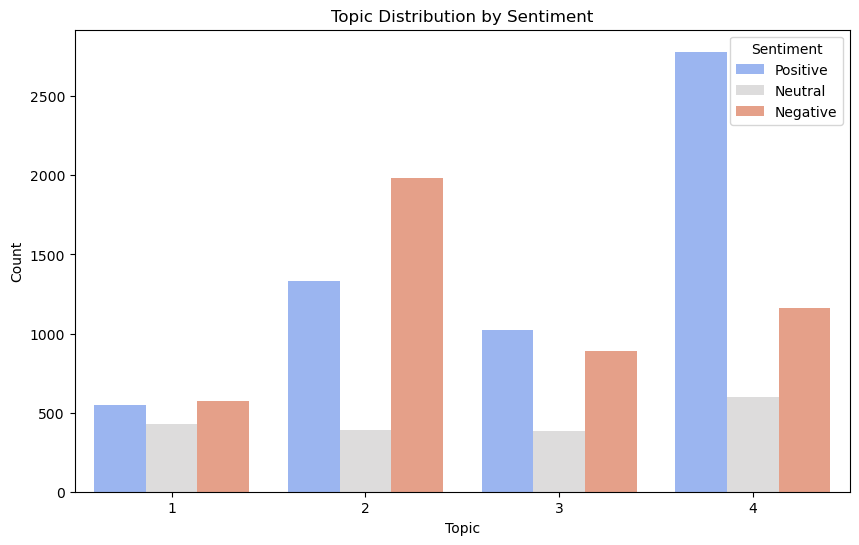

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df has 'Topic' and 'Sentiment' columns
plt.figure(figsize=(10, 6))
sns.countplot(x='Topic', hue='Sentiment', data=df, palette='coolwarm')
plt.title('Topic Distribution by Sentiment')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

# Classification

## 10. Data Splitting

In [40]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df['Tokenized_Text']  # Assuming 'Tokenized_Text' is the preprocessed text column
y = df['Sentiment']

# Split the dataset into training and testing sets (80% training, 20% testing)
# Set a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (8463,) (8463,)
Testing set shape: (3628,) (3628,)


## 11. Vectorization

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.astype(str))

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test.astype(str))

# Display the shape of the transformed data
print("TF-IDF Training set shape:", X_train_tfidf.shape)
print("TF-IDF Testing set shape:", X_test_tfidf.shape)

TF-IDF Training set shape: (8463, 5000)
TF-IDF Testing set shape: (3628, 5000)


## 12. Model Training

### 12.1 Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the TF-IDF transformed training data
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

    Negative       0.70      0.66      0.68      1369
     Neutral       1.00      0.14      0.25       508
    Positive       0.66      0.86      0.75      1751

    accuracy                           0.68      3628
   macro avg       0.79      0.55      0.56      3628
weighted avg       0.72      0.68      0.65      3628


Confusion Matrix:
[[ 908    0  461]
 [ 129   71  308]
 [ 253    0 1498]]


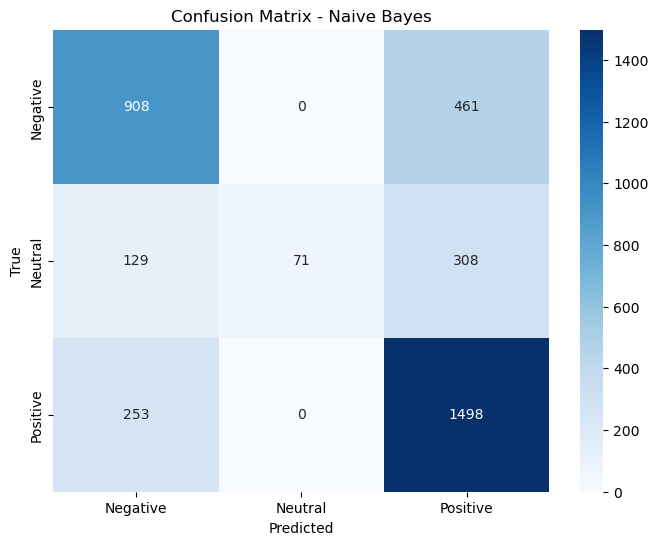

In [43]:
# Initialize LabelEncoder
le = LabelEncoder()

# Convert string labels to numerical format using LabelEncoder
y_test_numeric = le.fit_transform(y_test)

# Display confusion matrix heatmap for Naive Bayes
plt.figure(figsize=(8, 6))
cm_nb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 12.2 RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the RandomForestClassifier
random_forest_classifier = RandomForestClassifier()

# Train the classifier on the TF-IDF transformed training data
random_forest_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.73      0.75      1369
     Neutral       0.74      0.58      0.65       508
    Positive       0.77      0.85      0.81      1751

    accuracy                           0.77      3628
   macro avg       0.76      0.72      0.74      3628
weighted avg       0.77      0.77      0.77      3628


Confusion Matrix:
[[1004   43  322]
 [  93  293  122]
 [ 196   58 1497]]


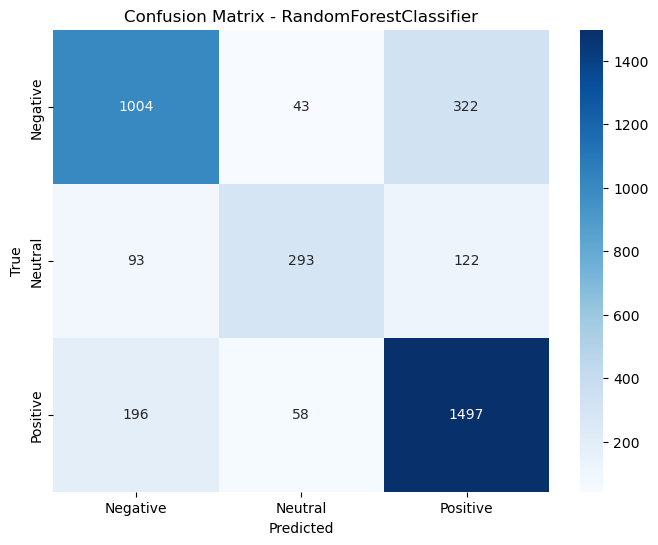

In [45]:
# Initialize LabelEncoder
le = LabelEncoder()

# Convert string labels to numerical format using LabelEncoder
y_test_numeric = le.fit_transform(y_test)

# Display confusion matrix heatmap for RandomForestClassifier
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 12.3 AdaBoostClassifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# AdaBoostClassifier
ada_boost_classifier = AdaBoostClassifier()
ada_boost_classifier.fit(X_train_tfidf, y_train)
y_pred_ada = ada_boost_classifier.predict(X_test_tfidf)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoostClassifier Accuracy: {accuracy_ada:.2f}")

# Display classification report and confusion matrix for AdaBoostClassifier
print("\nAdaBoostClassifier Classification Report:")
print(classification_report(y_test, y_pred_ada))

print("\nAdaBoostClassifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))

AdaBoostClassifier Accuracy: 0.67

AdaBoostClassifier Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.59      0.65      1369
     Neutral       0.51      0.45      0.48       508
    Positive       0.69      0.80      0.74      1751

    accuracy                           0.67      3628
   macro avg       0.64      0.61      0.62      3628
weighted avg       0.67      0.67      0.67      3628


AdaBoostClassifier Confusion Matrix:
[[ 809   96  464]
 [ 101  228  179]
 [ 220  122 1409]]


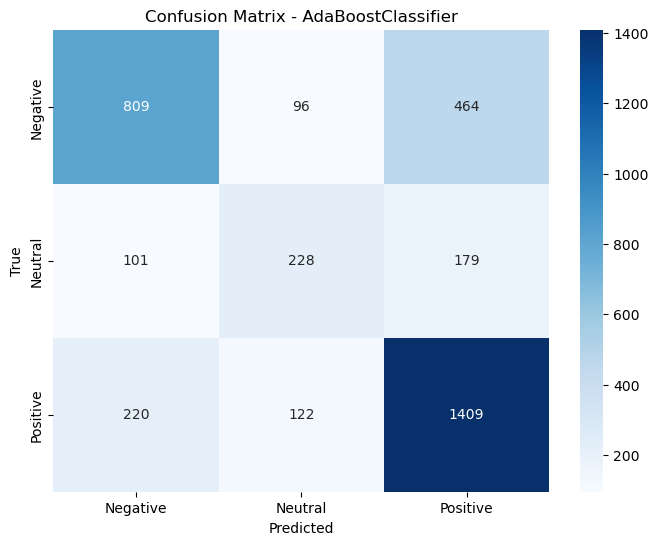

In [47]:
# Display confusion matrix heatmap for AdaBoostClassifier
plt.figure(figsize=(8, 6))
cm_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - AdaBoostClassifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 12.4 GradientBoostingClassifier

In [48]:
grad_boost_classifier = GradientBoostingClassifier()
grad_boost_classifier.fit(X_train_tfidf, y_train)
y_pred_grad = grad_boost_classifier.predict(X_test_tfidf)
accuracy_grad = accuracy_score(y_test, y_pred_grad)
print(f"GradientBoostingClassifier Accuracy: {accuracy_grad:.2f}")

# Display classification report and confusion matrix for GradientBoostingClassifier
print("\nGradientBoostingClassifier Classification Report:")
print(classification_report(y_test, y_pred_grad))

print("\nGradientBoostingClassifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_grad))

GradientBoostingClassifier Accuracy: 0.71

GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.67      0.70      1369
     Neutral       0.80      0.31      0.45       508
    Positive       0.70      0.86      0.77      1751

    accuracy                           0.71      3628
   macro avg       0.74      0.62      0.64      3628
weighted avg       0.72      0.71      0.70      3628


GradientBoostingClassifier Confusion Matrix:
[[ 916   20  433]
 [ 123  160  225]
 [ 218   20 1513]]


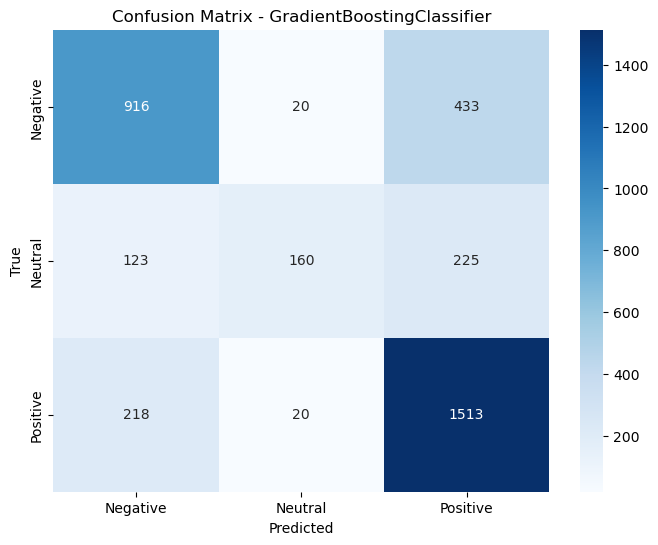

In [49]:
# Display confusion matrix heatmap for GradientBoostingClassifier
plt.figure(figsize=(8, 6))
cm_grad = confusion_matrix(y_test, y_pred_grad)
sns.heatmap(cm_grad, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - GradientBoostingClassifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()